In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import wrangle as wr
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from pydataset import data
from env import host, user, password

#import ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [2]:
# get the clean data
df = wr.wrangle_zillow()


In [3]:
# check it out
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [5]:
# remove the discrete columns to prep for scaling
df = df.drop(columns=['yearbuilt','fips'])
# Instructor answer -  remove value column since it is the target
# change year back to continuous and do analysis on it


In [6]:
# double check it's all continuous data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 5 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   taxamount                     float64
dtypes: float64(5)
memory usage: 98.0 MB


In [7]:
# split the data
train, validate, test = wr.split_zillow(df)

In [8]:
# check it out
train.head()


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount
600291,3.0,1.0,919.0,363438.0,4563.12
1465690,4.0,3.0,1892.0,629340.0,7585.83
2009603,4.0,2.0,2224.0,388825.0,4679.10
2088361,3.0,2.0,1409.0,224380.0,3091.22
1181326,3.0,1.0,1059.0,632000.0,7247.50


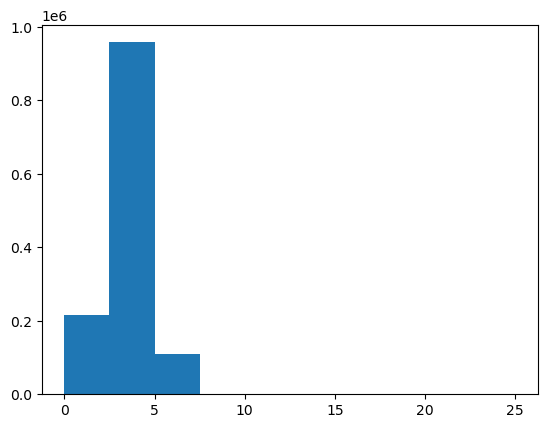

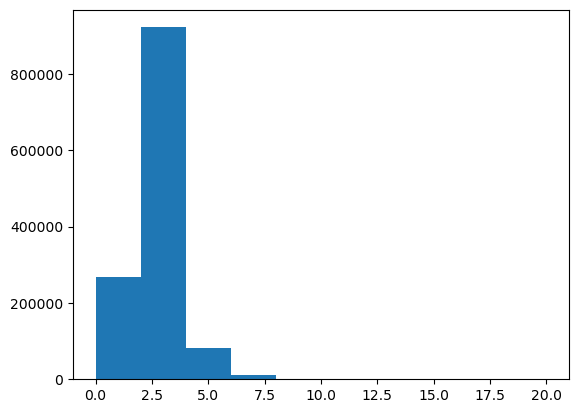

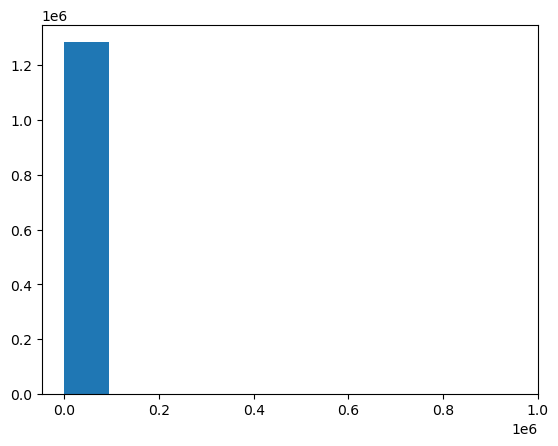

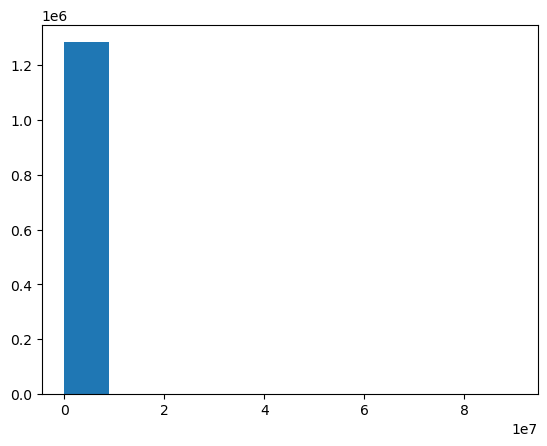

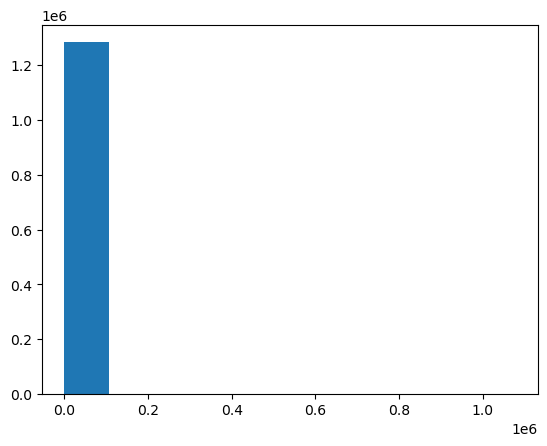

In [39]:
# visualize before scaling
for col in train.columns:
    plt.figure()
    plt.hist(train[col], bins=10)

In [10]:
#scaling fit
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [11]:
train_scaled = pd.DataFrame(train_scaled)


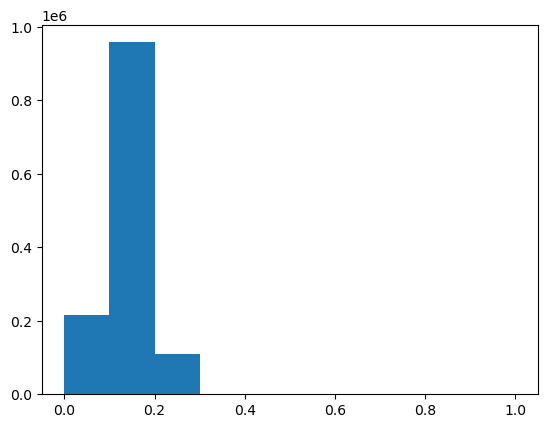

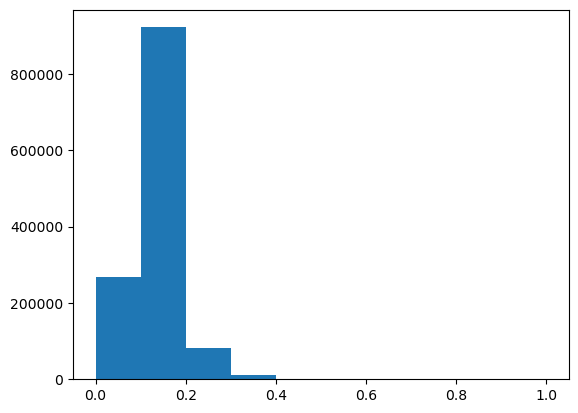

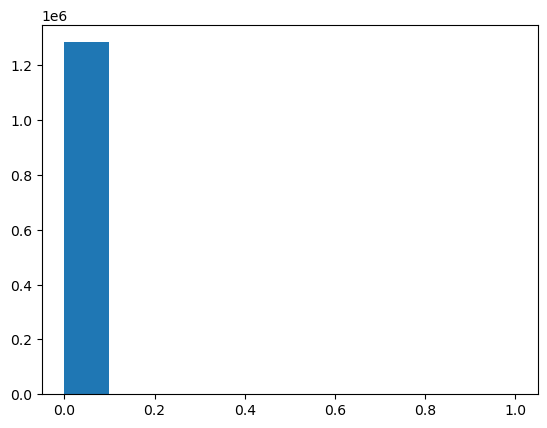

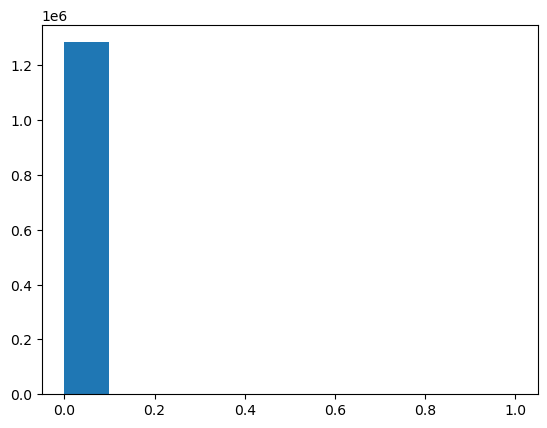

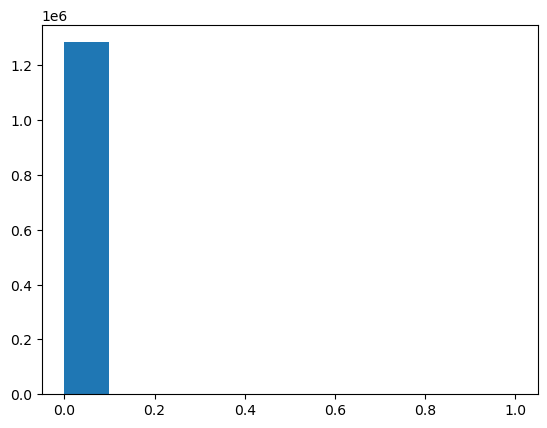

In [38]:
# visualize the scaled data
for col in train_scaled.columns:
    plt.figure()
    plt.hist(train_scaled[col], bins=10)


### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
# inverse transform

train_inverse_scaled = scaler.inverse_transform(train_scaled)
validate_inverse_scaled = scaler.inverse_transform(validate_scaled)
test_inverse_scaled = scaler.inverse_transform(test_scaled)

In [14]:
train_inverse_scaled = pd.DataFrame(train_inverse_scaled)

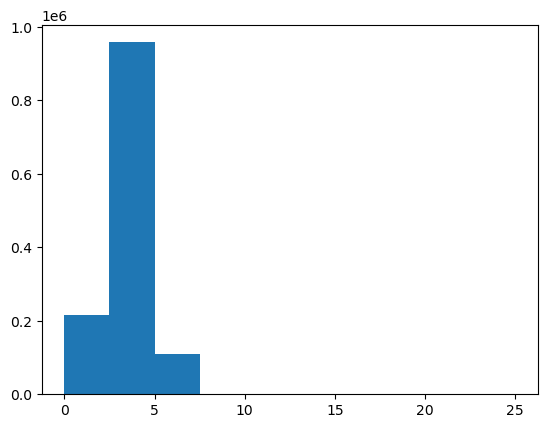

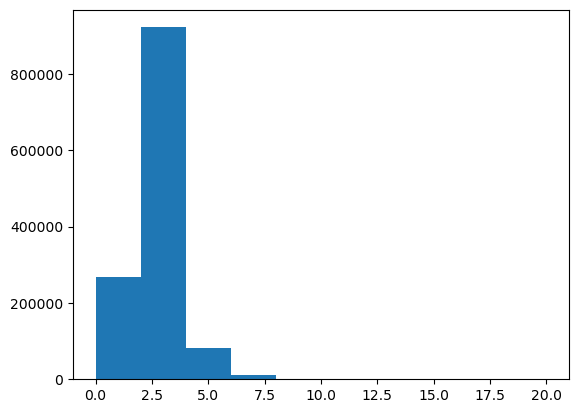

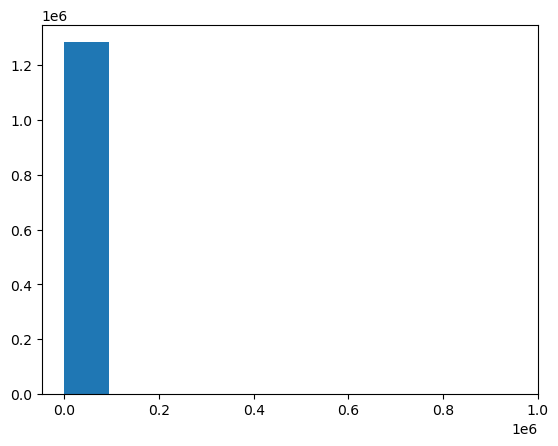

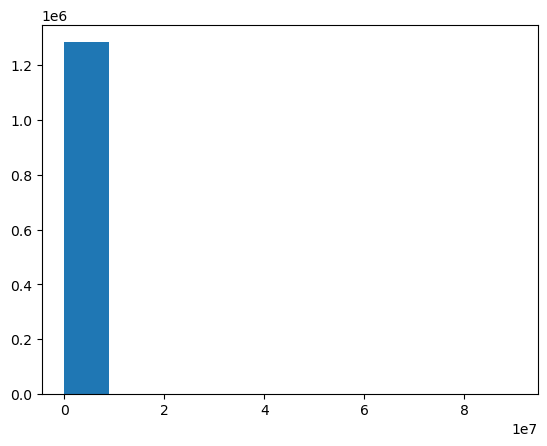

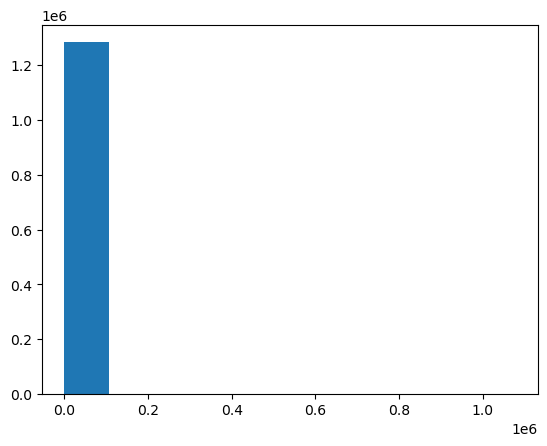

In [15]:
 # visualize the scaled data
for col in train_inverse_scaled.columns:
    plt.figure()
    plt.hist(train_inverse_scaled[col])


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [16]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)

In [17]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

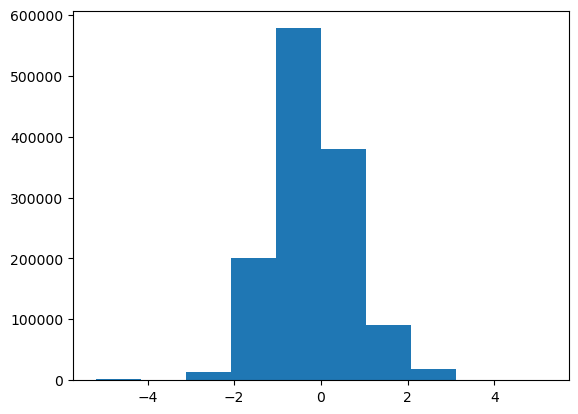

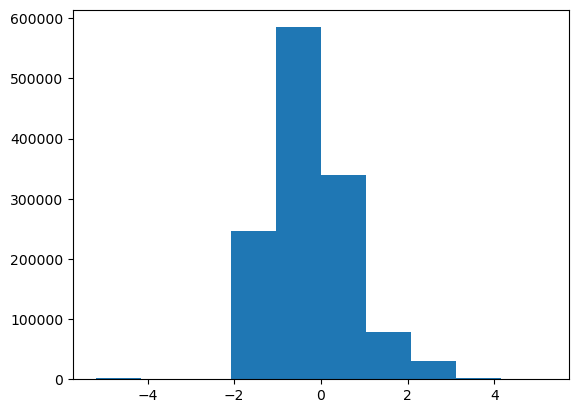

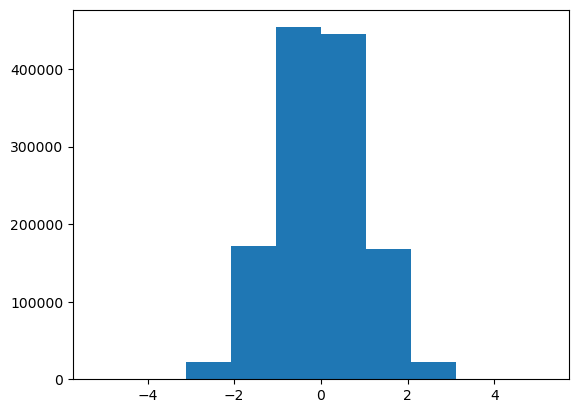

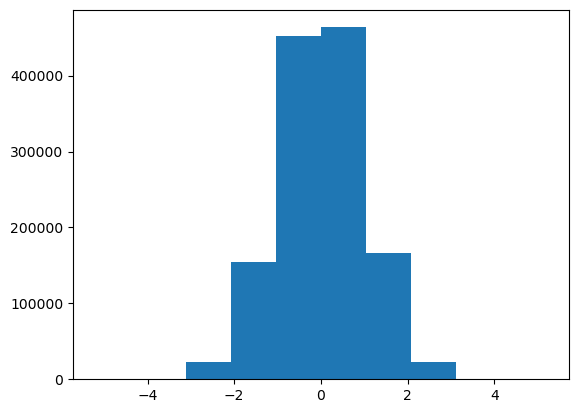

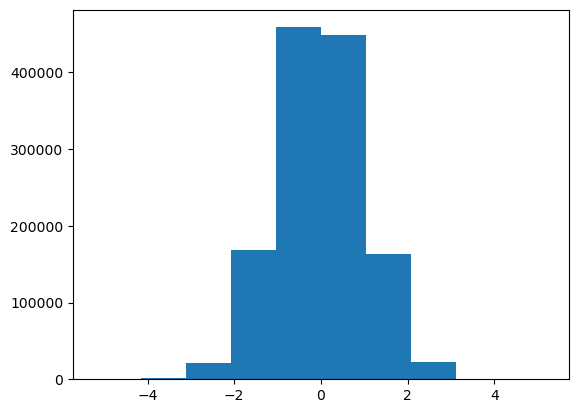

In [18]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


In [19]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer()

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)

In [20]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

In [21]:
train_quantile_scaled.head()

,0,1,2,3,4
0,0.387888,0.095596,0.060289,0.552439,0.561323
1,0.761261,0.812312,0.639640,0.810988,0.820343
2,0.761261,0.423423,0.758816,0.584231,0.574034
3,0.387888,0.423423,0.359359,0.312657,0.337289
4,0.387888,0.095596,0.125868,0.812813,0.801996


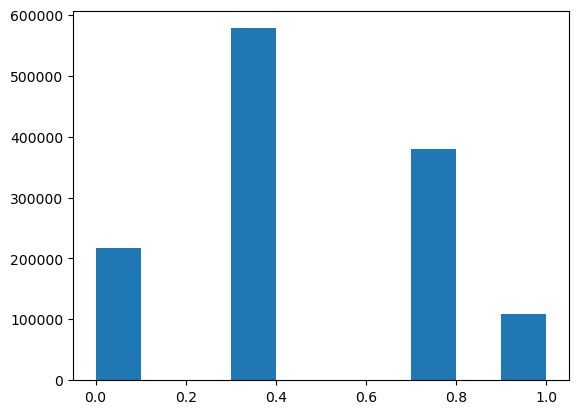

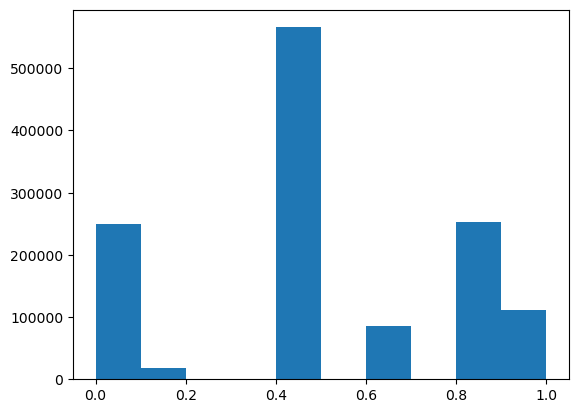

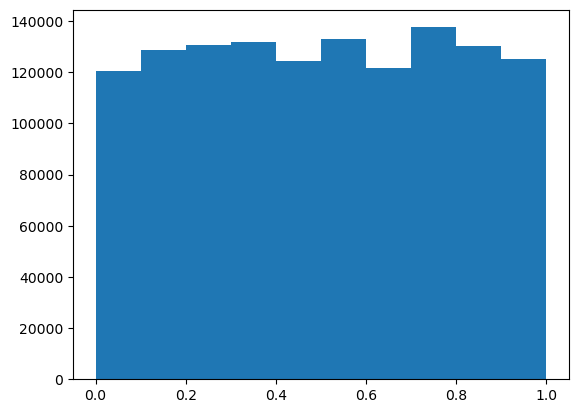

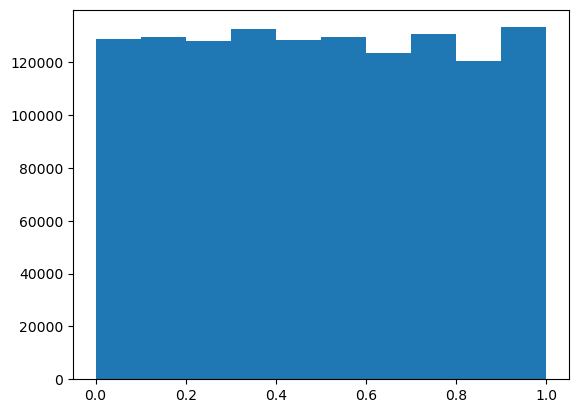

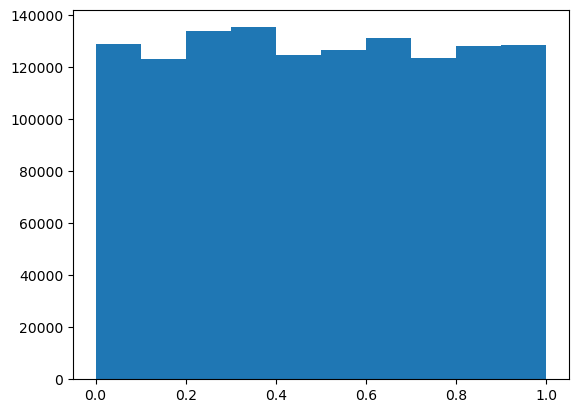

In [22]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])


### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [23]:
def scaled_data(train, validate, test):
    '''This function takes in the train, validate, and test dataframes and returns the scaled data as dataframes.'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()

    scaler.fit(train)

    train_scaled = pd.DataFrame(scaler.transform(train))
    validate_scaled = pd.DataFrame(scaler.transform(validate))
    test_scaled = pd.DataFrame(scaler.transform(test))
    
    return train_scaled, validate_scaled, test_scaled

In [24]:
train_scaled, validate_scaled, test_scaled = scaled_data(train, validate, test)
train_scaled.head(), validate_scaled.head(), test_scaled.head()

(      0     1         2         3         4
 0  0.12  0.05  0.000964  0.004030  0.004227
 1  0.16  0.15  0.001985  0.006978  0.007030
 2  0.16  0.10  0.002334  0.004311  0.004334
 3  0.12  0.10  0.001478  0.002488  0.002861
 4  0.12  0.05  0.001111  0.007007  0.006717,
       0     1         2         3         4
 0  0.16  0.10  0.001618  0.002126  0.001778
 1  0.16  0.10  0.001520  0.000658  0.000912
 2  0.16  0.15  0.002454  0.003180  0.004109
 3  0.12  0.05  0.001082  0.003494  0.003647
 4  0.12  0.10  0.001368  0.000650  0.000835,
       0      1         2         3         4
 0  0.20  0.275  0.004292  0.022495  0.020547
 1  0.16  0.100  0.002458  0.005873  0.005259
 2  0.12  0.050  0.001036  0.003644  0.003716
 3  0.12  0.100  0.001275  0.003595  0.003612
 4  0.16  0.125  0.001897  0.007496  0.006794)

## Min-Max Scaling


Text(0.5, 1.0, 'Scaled')

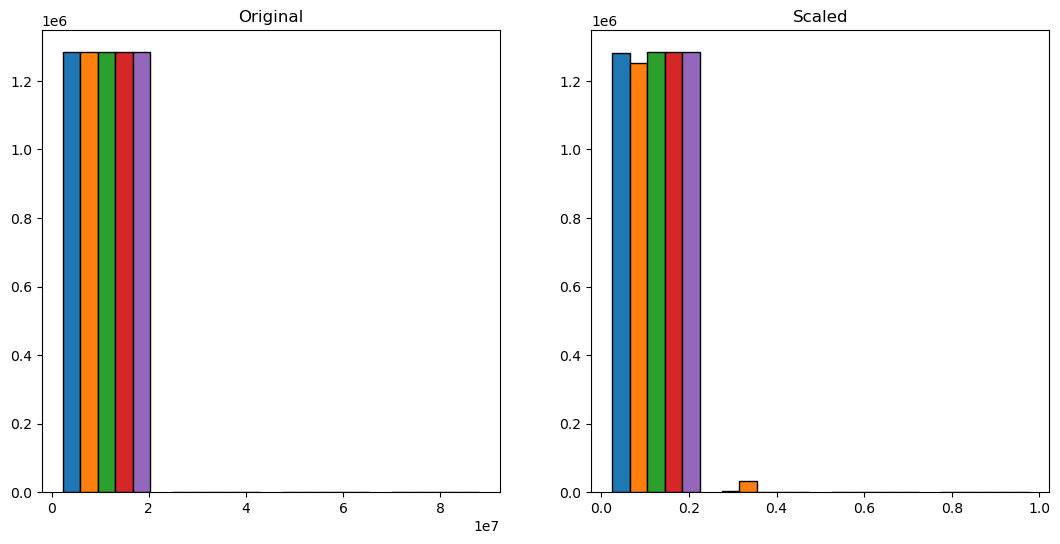

In [45]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train))
validate_scaled = pd.DataFrame(scaler.transform(validate))
test_scaled = pd.DataFrame(scaler.transform(test))

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=4, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=4, ec='black')
plt.title('Scaled')


## Standard Scaler
 Standardization is a linear transformation of our data such that is looks like the standard normal distribution. That is, it will have a mean of 0 and a standard deviation of 1.

x
′
=
x
−
¯
x
σ
x

 Sometimes this is split into two operations:

 * scaling is dividing each data point by the standard deviation. This causes the resulting dataset to have a standard deviation of 1.
* centering is subtracting the mean from each data point. This causes the resulting dataset to have a mean of 0.



Text(0.5, 1.0, 'Scaled')

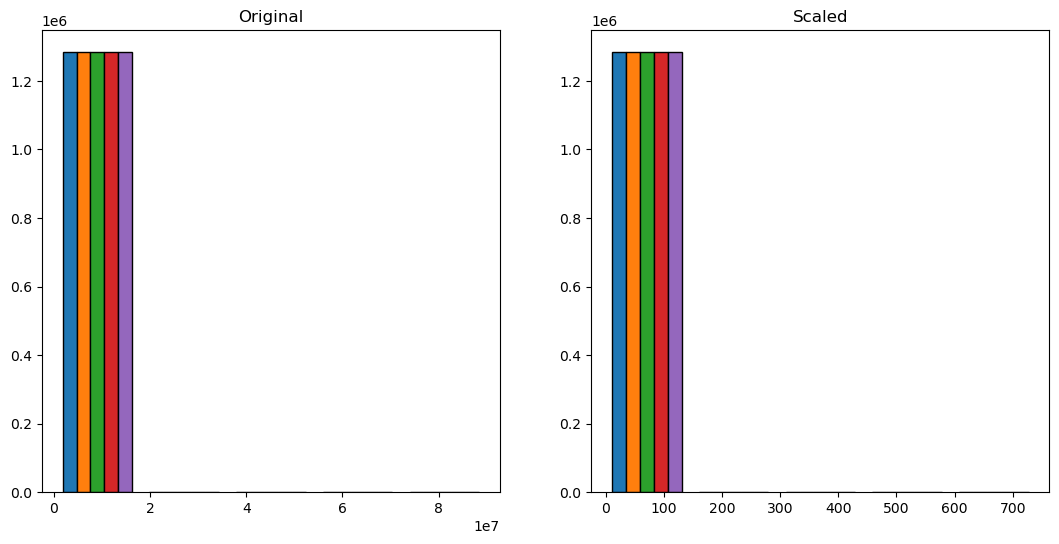

In [36]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train))
validate_scaled = pd.DataFrame(scaler.transform(validate))
test_scaled = pd.DataFrame(scaler.transform(test))

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=5, ec='black')
plt.title('Scaled')


## RobustScaler

A robust scaler is another linear transformation that follows the same idea as the standard scaler but uses parameters that are more robust to outliers.

x
′
=
x
−
med
(
x
)
IQR
x


Text(0.5, 1.0, 'Scaled')

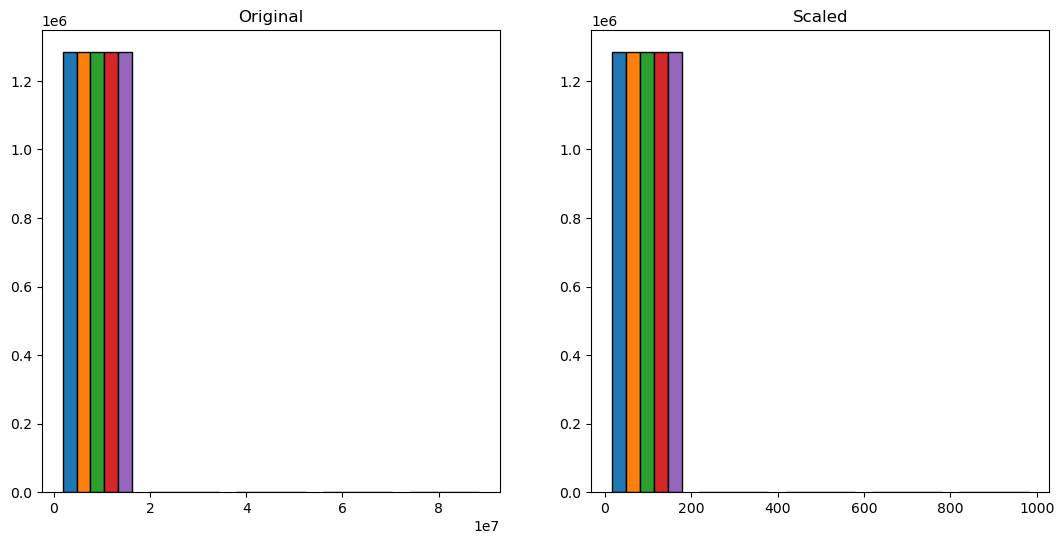

In [35]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train))
validate_scaled = pd.DataFrame(scaler.transform(validate))
test_scaled = pd.DataFrame(scaler.transform(test))

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins= 5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=5, ec='black')
plt.title('Scaled')
